In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# calling data
%store -r X_train
X_train = X_train

%store -r y_train
y_train = y_train

%store -r X_val
X_val = X_val

%store -r y_val
y_val = y_val

%store -r X_test
X_test = X_test

%store -r y_test
y_test = y_test

based on each model, we define specific pipeline and build and train model

In [3]:
def evaluate_model(X_train, y_train, X_val, y_val, model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    cross_val_r2 = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cross_val_rmse = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

    print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    r2_train = r2_score(y_train, y_train_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_val = r2_score(y_val, y_val_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

    print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
    print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

## Model Training

### Linear Regression

In [4]:
model = Pipeline([
    ('scaler', StandardScaler()), # since linear regression algorithm needs scaling
    ('lin_reg', LinearRegression())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9991, Training CV RMSE: -95.2011
Training R2: 0.9991, Training RMSE: 95.8568
Validation R2: 0.9996, Validation RMSE: 63.3000


- The model is not underfit (both CV and Validation is high) and overfit (CV and Validation are close to each other)

### Decision Tree Regressor

In [5]:
model = Pipeline([
    ('decisiontree_reg', DecisionTreeRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.8921, Training CV RMSE: -1028.7946
Training R2: 1.0000, Training RMSE: 0.0000
Validation R2: 0.8962, Validation RMSE: 1001.0150


- This model is overfit (CV train and train have gap). But, since the gap between CV and Validation is small, that overfitting is not severe.
- Model not suitable for further progress

### Random Tree Regressor

In [6]:
model = Pipeline([
    ('randomforest_reg', RandomForestRegressor())
])

In [7]:
evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9601, Training CV RMSE: -628.2130
Training R2: 0.9949, Training RMSE: 223.2282
Validation R2: 0.9623, Validation RMSE: 603.1290


- This model is not underfit (Both CV and Validation are high) and overfit (CV and Validation are close to each other)
- RMSE is worse than linear regression. so not suitable for further progress

### Support Vector Regression

In [8]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='rbf'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.0685, Training CV RMSE: -3027.3353
Training R2: 0.0862, Training RMSE: 2999.4412
Validation R2: 0.0855, Validation RMSE: 2971.9019


- R2 and RMSE shows how poor this model performs
- Not suitable for further progress

### XGBoost Regressor

In [9]:
model = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBRegressor(objective='reg:squarederror'))
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.9920, Training CV RMSE: -279.9875
Training R2: 0.9986, Training RMSE: 116.9903
Validation R2: 0.9927, Validation RMSE: 264.7581


- The model is not underfit (both CV and Validation is high) and overfit (CV and Validation are close to each other)
- Almost near to linear regression. Still linear regression algorithm is better

### Catboost Regressor

In [10]:
model = Pipeline([
    ('catboost', CatBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Learning rate set to 0.052996
0:	learn: 3006.9624961	total: 318ms	remaining: 5m 17s
1:	learn: 2889.2484087	total: 322ms	remaining: 2m 40s
2:	learn: 2776.2756506	total: 326ms	remaining: 1m 48s
3:	learn: 2672.7245880	total: 330ms	remaining: 1m 22s
4:	learn: 2570.2551662	total: 333ms	remaining: 1m 6s
5:	learn: 2473.1900935	total: 338ms	remaining: 56s
6:	learn: 2384.9782664	total: 342ms	remaining: 48.5s
7:	learn: 2301.9137213	total: 346ms	remaining: 42.9s
8:	learn: 2218.8095249	total: 349ms	remaining: 38.5s
9:	learn: 2142.2385518	total: 354ms	remaining: 35.1s
10:	learn: 2064.5631548	total: 358ms	remaining: 32.2s
11:	learn: 1990.6641839	total: 362ms	remaining: 29.8s
12:	learn: 1923.7106663	total: 366ms	remaining: 27.8s
13:	learn: 1858.7622475	total: 371ms	remaining: 26.1s
14:	learn: 1797.1472561	total: 374ms	remaining: 24.6s
15:	learn: 1735.5151660	total: 378ms	remaining: 23.2s
16:	learn: 1679.6406233	total: 382ms	remaining: 22.1s
17:	learn: 1629.7974601	total: 386ms	remaining: 21s
18:	lear

- There is no overfit since training and validaion metrics are pretty close to each other
- No underfit as both metrics are high
- RMSE score is much better than linear regression algorithm

### AdaBoost Regressor

In [11]:
model = Pipeline([
    ('adaboost', AdaBoostRegressor())
])

evaluate_model(X_train, y_train, X_val, y_val, model)

Training CV R2: 0.8865, Training CV RMSE: -1065.7031
Training R2: 0.8949, Training RMSE: 1017.4532
Validation R2: 0.8847, Validation RMSE: 1055.2753


- CV and Validation metrics are comparetively less. RMSE score is worse

## Model Selection

Based on the result of default model training, the best model is `CatBoost` with R2 0.9997 and RMSE ~50

In [12]:
best_model = CatBoostRegressor()
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {-cross_val_rmse.mean():.4f}")

best_model.fit(X_train, y_train, logging_level='Silent')

y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

Learning rate set to 0.052996
0:	learn: 3006.9624961	total: 4.34ms	remaining: 4.34s
1:	learn: 2889.2484087	total: 8.64ms	remaining: 4.31s
2:	learn: 2776.2756506	total: 12.5ms	remaining: 4.15s
3:	learn: 2672.7245880	total: 17ms	remaining: 4.24s
4:	learn: 2570.2551662	total: 23.5ms	remaining: 4.67s
5:	learn: 2473.1900935	total: 27.8ms	remaining: 4.6s
6:	learn: 2384.9782664	total: 33.4ms	remaining: 4.73s
7:	learn: 2301.9137213	total: 37.1ms	remaining: 4.6s
8:	learn: 2218.8095249	total: 40.7ms	remaining: 4.48s
9:	learn: 2142.2385518	total: 46.2ms	remaining: 4.58s
10:	learn: 2064.5631548	total: 50ms	remaining: 4.49s
11:	learn: 1990.6641839	total: 53.8ms	remaining: 4.43s
12:	learn: 1923.7106663	total: 57.5ms	remaining: 4.36s
13:	learn: 1858.7622475	total: 62.9ms	remaining: 4.43s
14:	learn: 1797.1472561	total: 66.7ms	remaining: 4.38s
15:	learn: 1735.5151660	total: 70.5ms	remaining: 4.34s
16:	learn: 1679.6406233	total: 74.6ms	remaining: 4.31s
17:	learn: 1629.7974601	total: 78.6ms	remaining: 4.

## Tune model with Hyper-parameter

In [13]:
params = {
    'iterations':[100,200], # Number of boosting iterations
    'learning_rate':[0.01,0.05,0.1], # Step size at each iteration
    'depth':[4,6,8], # Depth of the trees
    'l2_leaf_reg':[1,3,5], # L2 regularization coefficient
    'border_count':[32, 64] # Number of splits in categorical features
}

grid_search = GridSearchCV(
    estimator=best_model,
    param_grid=params,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print('Best parameters found : ',grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
0:	learn: 2883.1653777	total: 5.36ms	remaining: 1.07s
1:	learn: 2647.7893736	total: 10.2ms	remaining: 1.01s
2:	learn: 2439.6415334	total: 15.7ms	remaining: 1.03s
3:	learn: 2256.6209123	total: 23.7ms	remaining: 1.16s
4:	learn: 2084.4874593	total: 29ms	remaining: 1.13s
5:	learn: 1924.6212948	total: 34.1ms	remaining: 1.1s
6:	learn: 1774.7587239	total: 41ms	remaining: 1.13s
7:	learn: 1655.9915074	total: 47.1ms	remaining: 1.13s
8:	learn: 1538.1763158	total: 53.5ms	remaining: 1.14s
9:	learn: 1436.6818232	total: 58.3ms	remaining: 1.11s
10:	learn: 1336.3733990	total: 63.1ms	remaining: 1.08s
11:	learn: 1235.3482853	total: 69.8ms	remaining: 1.09s
12:	learn: 1158.1435081	total: 74.3ms	remaining: 1.07s
13:	learn: 1070.6764398	total: 79.6ms	remaining: 1.06s
14:	learn: 1004.9516185	total: 86.4ms	remaining: 1.07s
15:	learn: 934.7253310	total: 91ms	remaining: 1.05s
16:	learn: 871.7079656	total: 95.8ms	remaining: 1.03s
17:	learn: 815.698365

In [14]:
best_model_tuned = grid_search.best_estimator_
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cross_val_r2 = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='r2')
cross_val_rmse = cross_val_score(best_model_tuned, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')

print(f"Training CV R2: {cross_val_r2.mean():.4f}, Training CV RMSE: {cross_val_rmse.mean():.4f}")

best_model_tuned.fit(X_train, y_train)

y_train_pred = best_model_tuned.predict(X_train)
y_val_pred = best_model_tuned.predict(X_val)

r2_train = r2_score(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_val = r2_score(y_val, y_val_pred)
rmse_val = np.sqrt(mean_squared_error(y_val,y_val_pred))

print(f"Training R2: {r2_train:.4f}, Training RMSE: {rmse_train:.4f}")
print(f"Validation R2: {r2_val:.4f}, Validation RMSE: {rmse_val:.4f}")

0:	learn: 2876.5139202	total: 10.1ms	remaining: 2.01s
1:	learn: 2644.0087261	total: 14.6ms	remaining: 1.44s
2:	learn: 2451.1514144	total: 19ms	remaining: 1.25s
3:	learn: 2261.4721156	total: 26.4ms	remaining: 1.29s
4:	learn: 2096.5276915	total: 30.5ms	remaining: 1.19s
5:	learn: 1937.9882168	total: 34.5ms	remaining: 1.12s
6:	learn: 1784.3550352	total: 40.6ms	remaining: 1.12s
7:	learn: 1664.7758267	total: 45.9ms	remaining: 1.1s
8:	learn: 1539.7996288	total: 54.4ms	remaining: 1.15s
9:	learn: 1436.9964874	total: 58.9ms	remaining: 1.12s
10:	learn: 1336.6123695	total: 65.6ms	remaining: 1.13s
11:	learn: 1241.9470570	total: 70.6ms	remaining: 1.1s
12:	learn: 1161.7390407	total: 75.4ms	remaining: 1.08s
13:	learn: 1078.6379298	total: 81.6ms	remaining: 1.08s
14:	learn: 1008.5871002	total: 85.9ms	remaining: 1.06s
15:	learn: 952.4370163	total: 90.7ms	remaining: 1.04s
16:	learn: 888.8982900	total: 98.4ms	remaining: 1.06s
17:	learn: 835.3034611	total: 103ms	remaining: 1.04s
18:	learn: 779.1262452	total

## Final Evaluation of Model

#### We can clearly see the model which is not tuned performs better than the model which is tuned.
#### Thus, we consider the default model as the final model.

In [15]:
final_model = best_model

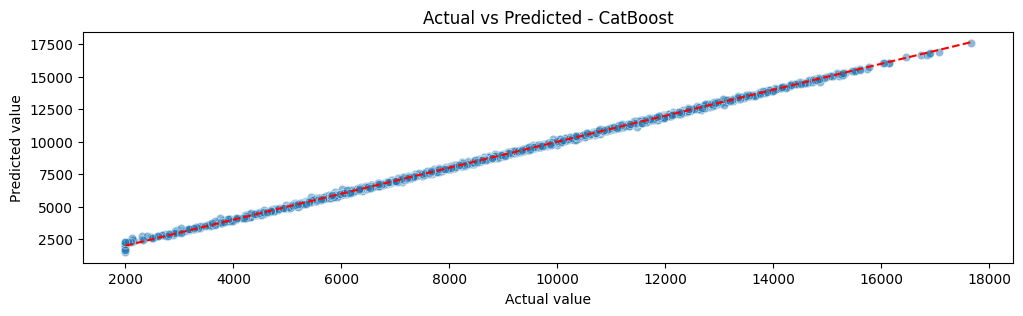

In [16]:
## Scatter Plot - Actual vs Predicted
plt.figure(figsize=(12, 3))

sns.scatterplot(
    x = y_val,
    y = y_val_pred,
    alpha = 0.5
)

plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], '--', color='red')
plt.xlabel('Actual value')
plt.ylabel('Predicted value')
plt.title('Actual vs Predicted - CatBoost')

plt.show()

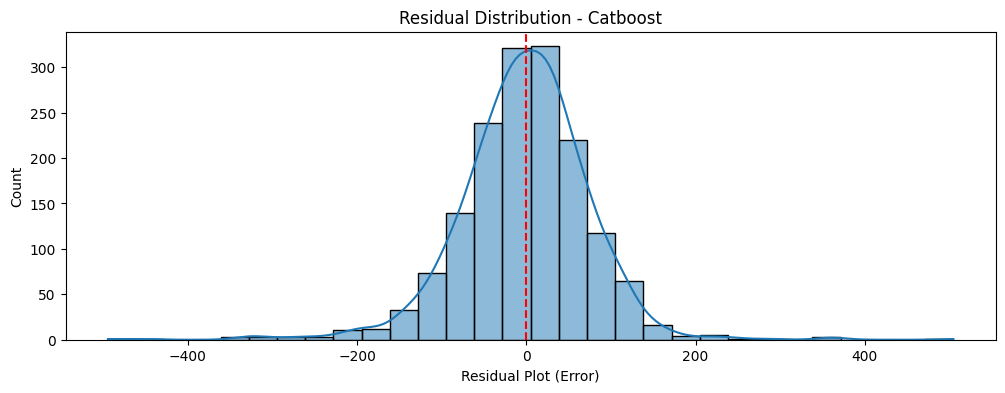

In [17]:
## Residual Plot (Error)
residuals = y_val - y_val_pred

plt.figure(figsize=(12,4))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel('Residual Plot (Error)')
plt.title('Residual Distribution - Catboost')
plt.show()

## Apply Model on Test data

In [18]:
# Load saved encoders
with open('../../models/Brand_Encoder.pkl', 'rb') as f:
    brand_encoder = pickle.load(f)
with open('../../models/Model_Encoder.pkl', 'rb') as f:
    model_encoder = pickle.load(f)
with open('../../models/OneHot_Encoder.pkl', 'rb') as f:
    onehot_encoder = pickle.load(f)

In [19]:
# Copy test data
X_test_copy = X_test.copy()

In [20]:
# Apply mean encoding for Brand and Model
X_test_copy['Brand'] = X_test_copy['Brand'].map(brand_encoder)
X_test_copy['Brand'].fillna(brand_encoder.mean(), inplace=True)

X_test_copy['Model'] = X_test_copy['Model'].map(model_encoder)
X_test_copy['Model'].fillna(model_encoder.mean(), inplace=True)

In [21]:
# One-hot encoding for Fuel and Transmission
cat_columns = ['Transmission', 'Fuel_Type']

encoded_array = onehot_encoder.transform(X_test_copy[cat_columns])
encoded_df = pd.DataFrame(encoded_array, 
                          columns=onehot_encoder.get_feature_names_out(cat_columns), 
                          index=X_test_copy.index)

In [22]:
# Drop original categorical columns and merge
X_test_encoded = X_test_copy.drop(columns=cat_columns)
X_test_encoded = pd.concat([X_test_encoded, encoded_df], axis=1)

In [23]:
X_test_encoded.head(2)

,Brand,Model,Year,Engine_Size,Mileage,Doors,Owner_Count,Transmission_Manual,Transmission_Semi-Automatic,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol
6252,8650.208122,8854.695971,2005,1.2,257760,5,5,1.0,0.0,0.0,0.0,0.0
4684,8901.128019,8782.205323,2013,2.9,111790,5,3,0.0,0.0,0.0,1.0,0.0


In [24]:
# Add missing columns
%store -r train_columns

missing_cols = set(train_columns) - set(X_test_encoded.columns)
# for col in missing_cols:
    # X_test_encoded[col] = 0

In [25]:
# Drop any extra columns and reorder to match training
X_test_encoded = X_test_encoded[train_columns]
X_test_final = X_test_encoded

In [26]:
y_pred = best_model.predict(X_test_final)
y_pred

array([ 1951.81839612, 11207.98930318, 14559.96041995, ...,
        8134.90806728,  6651.44888881, 11850.81090473], shape=(2000,))

In [27]:
r2_test = r2_score(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Test R2: {r2_test:.4f}, Test RMSE: {rmse_test:.4f}")

Test R2: 0.9997, Test RMSE: 48.3785


#### The result shows model is well generalized and there is no overfitting/underfitting.

In [28]:
##Checkpoint

pickle.dump(best_model, open('../../models/Model.pkl', 'wb'))